In [7]:
# Use scikit-learn to grid search the batch size and epochs
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, constraints, callbacks, utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from time import clock

In [5]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='Nadam', activation='softplus', neurons=3, init_mode='normal'):
    # create model
    model = tf.keras.Sequential()
    model.add(layers.Dense(neurons, input_dim=9, kernel_initializer=init_mode, activation=activation))
    model.add(layers.Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(layers.Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(layers.Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# load dataset
dataset = np.loadtxt("contraceptive.csv", delimiter=",", skiprows=0)
# split into input (X) and output (Y) variables
X = dataset[:,0:9]
Y = dataset[:,9].astype(int)-1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)


In [6]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10]
epochs = [100]
optimizer = ['Nadam', 'SGD', 'RMSprop']
activation = ['softplus']
neurons = [10]
init_mode = ['glorot_normal', 'uniform', 'he_uniform']

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, activation=activation,
                 neurons=neurons, init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

# Fit 'grid' to the training data
start = clock()
grid_result = grid.fit(X_train, y_train)
stop = clock()
print('Time to hypertune: {:.3f}'.format(stop-start))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# Mean fit and score time for best parameters
print('Mean fit time: {:.4f}'.format(grid.cv_results_['mean_fit_time'][grid.best_index_]))
print('Mean score time: {:.4f}'.format(grid.cv_results_['mean_score_time'][grid.best_index_]))

c:\programdata\anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Time to hypertune: 80.500
Best: 0.561121 using {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'he_uniform', 'neurons': 10, 'optimizer': 'RMSprop'}
0.539049 (0.028634) with: {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'glorot_normal', 'neurons': 10, 'optimizer': 'Nadam'}
0.550085 (0.039030) with: {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'glorot_normal', 'neurons': 10, 'optimizer': 'SGD'}
0.546689 (0.048060) with: {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'glorot_normal', 'neurons': 10, 'optimizer': 'RMSprop'}
0.540747 (0.012989) with: {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'uniform', 'neurons': 10, 'optimizer': 'Nadam'}
0.477080 (0.041574) with: {'activation': 'softplus', 'batch_size': 10, 'epochs': 100, 'init_mode': 'uniform', 'neurons': 10, 'optimizer': 'SGD'}
0.516978 (0.024949) with: {'activation': 'softplus', 'batch_size': 10, 'epoc

In [19]:
# Extract best CV score from 'grid'
print('Best CV accuracy: {:.3f}'.format(grid.best_score_))

# Extract best model from 'grid'
best_model = grid.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# Print test set accuracy
print('Test set accuracy of best model: {:.3f}'.format(test_acc))

Best CV accuracy: 0.561
Test set accuracy of best model: 0.536


In [8]:
# Create the new model: model
model = tf.keras.Sequential()

# Add the first, second & third hidden layers
model.add(layers.Dense(10, input_dim=9, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(10, kernel_initializer='he_uniform', activation='softplus'))
model.add(layers.Dense(10, kernel_initializer='he_uniform', activation='softplus'))

# Add the output layer
model.add(layers.Dense(6, kernel_initializer='he_uniform', activation = 'softmax'))

# Compile model
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
# Instantiate unpruned Decision Tree
start = clock()
model_training= model.fit(X, Y, epochs=100, batch_size=10, validation_split=0.3, verbose=False)
stop = clock()
print('Time to fit network: {:.4f}'.format(stop-start))

# Predict and score results
start = clock()
y_pred = model.predict(X_test)
stop = clock()
print('Time to predict network: {:.4f}'.format(stop-start))


# Fit model
print('Training accuracy: {:4f}'.format(np.mean(model_training.history['acc'])))

print('Testing accuracy: {:4f}'.format(np.mean(model_training.history['val_acc'])))

Time to fit network: 8.9099
Time to predict network: 0.0037
Training accuracy: 0.659758
Testing accuracy: 0.497172


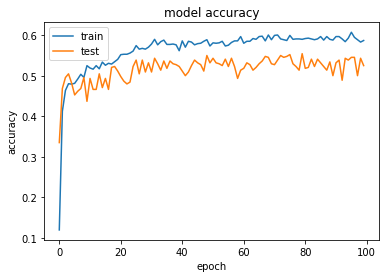

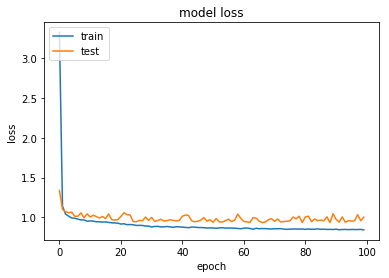

In [6]:
# summarize history for accuracy
plt.plot(model_training.history['acc'])
plt.plot(model_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()